In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('aerofit_treadmill.csv')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.shape

(180, 9)

2. Detect outliers

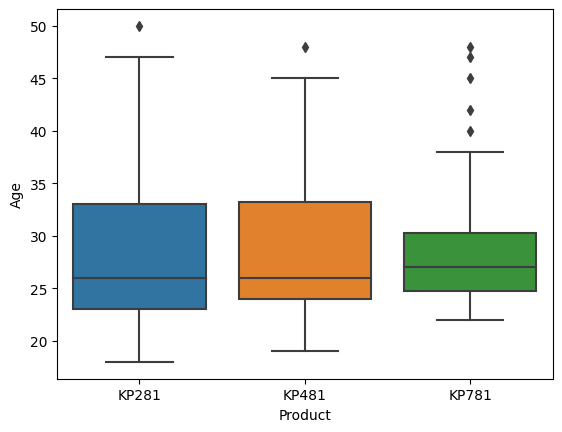

In [ ]:
sns.boxplot(x=df['Product'], y=df['Age'])
plt.show()

The KP281 is an entry-level treadmill that sells for $1,500 is majorly bought by the majority of the ages between 23 to 34 and has a peak for the age around 26 , whereas the The KP481 is for mid-level runners that sell for $1,750 is bought by people of ages ranging from 25 to to 34 majorly. The KP781 treadmill is having advanced features that sell for $2,500 is comparitively less in sales and is mostly bought by people between the age 26 and 30 and a very few till the age of 45

difference between mean and median for numerical columns

In [ ]:
print(df.describe())

              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


 Exploring the effect of features on product purchased

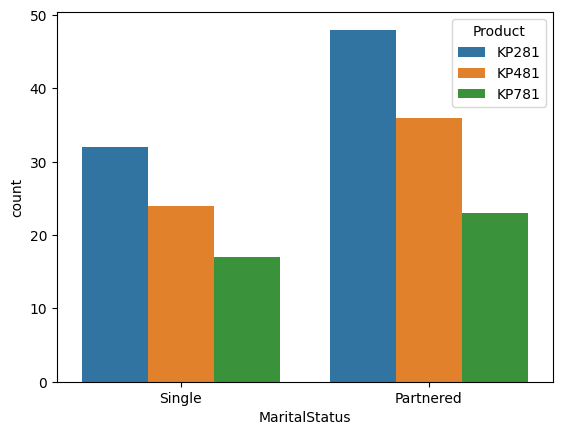

In [ ]:
# Countplot for marital status and product purchased
sns.countplot(x='MaritalStatus', hue='Product', data=df)
plt.show()

The people purchasing the tredmills are mostly the partnered once when compared to single one's as seen from the graph

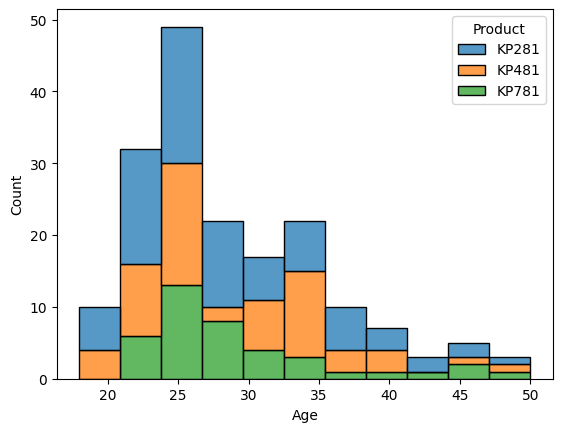

In [ ]:
# Histplot for age and product purchased
sns.histplot(x='Age', hue='Product', data=df, multiple='stack')
plt.show()

The entry level KP281 is amongst the most selling tredmills especially between at the age of 25 and also overall as it tops the sales amongst all age group because of its pricing and also the KP481 and KP781 is also having the most sales amongst people pf age 25 as they are the ones into fitness and want an upgraded device which is shown clearly

4. Represent marginal probabilities

In [ ]:
# Pandas crosstab for marginal probabilities
marginal_prob = pd.crosstab(index=df['Product'], columns='count', normalize=True)
print(marginal_prob)

col_0       count
Product          
KP281    0.444444
KP481    0.333333
KP781    0.222222


From this we can easily conclude that the one with the lower price has the higher number of sales and the others following them in a lesser percentage

5. Check correlation

<ipython-input-16-387dae86a4ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


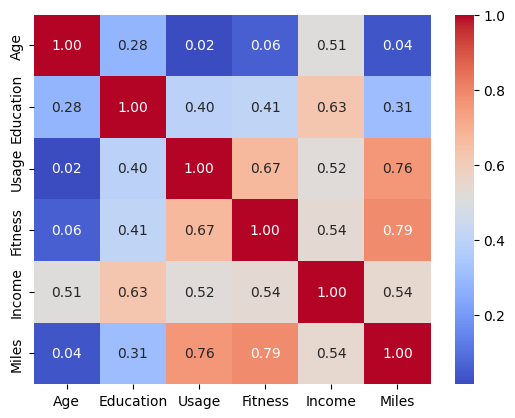

In [ ]:
# Heatmap for correlation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

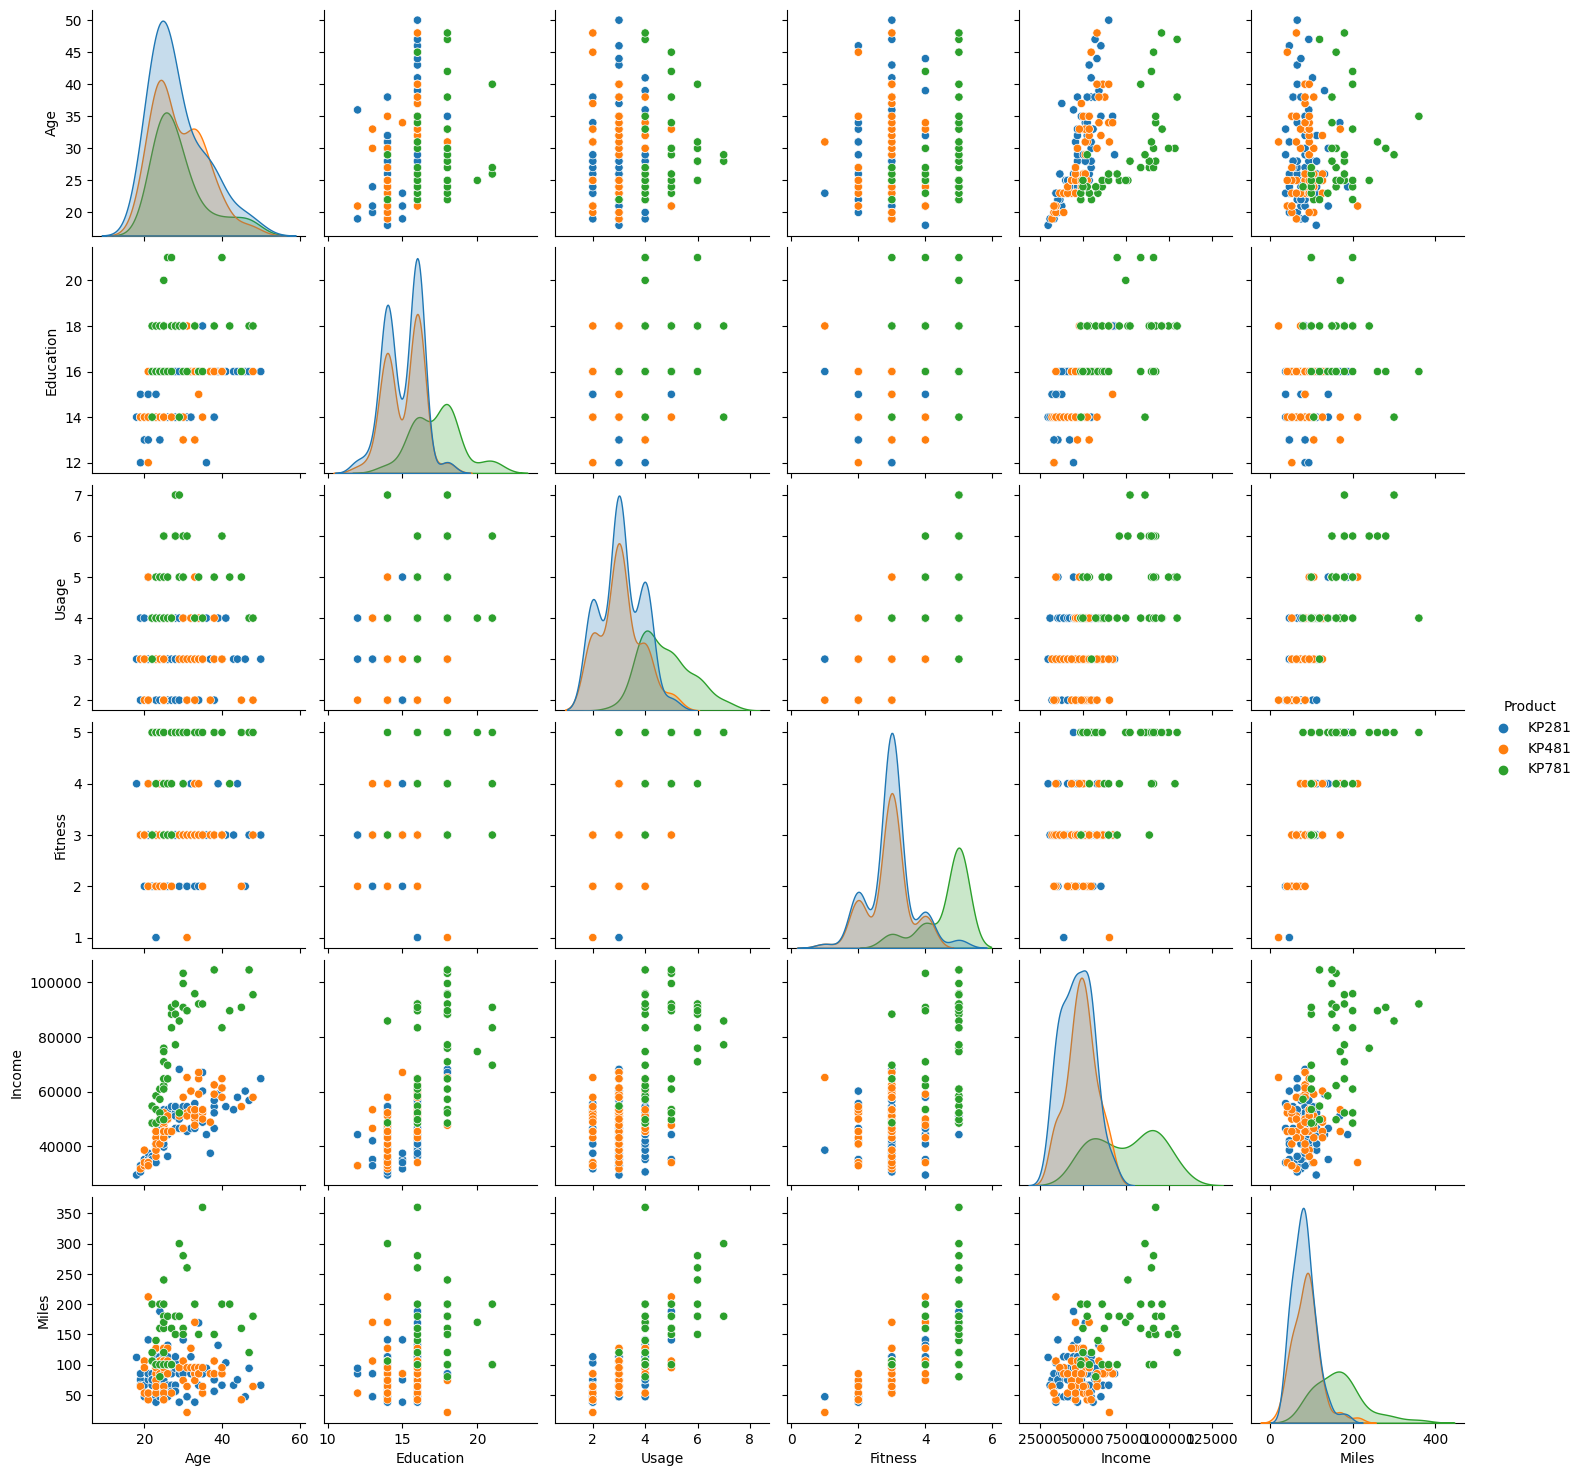

In [ ]:
# Pairplot for visualizing relationships
sns.pairplot(df, hue='Product')
plt.show()

Unique values and counts for categorical variables

In [ ]:

for column in df.select_dtypes(include=['object']).columns:
    print(f"Attribute: {column}")
    print(df[column].value_counts())
    print("\n")


Attribute: Product
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


Attribute: Gender
Male      104
Female     76
Name: Gender, dtype: int64


Attribute: MaritalStatus
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64




Univariate analysis for continuous variables

<ipython-input-14-057200d01f76>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


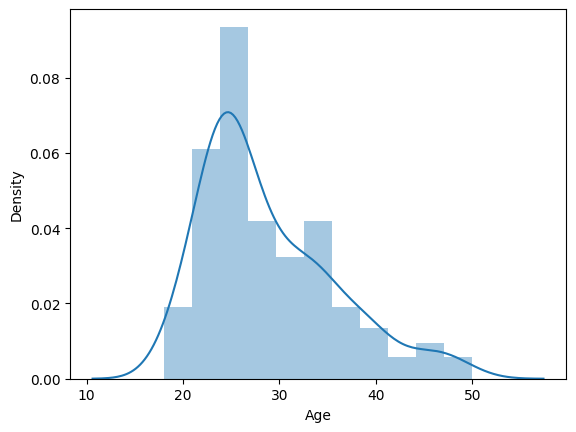

<ipython-input-14-057200d01f76>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


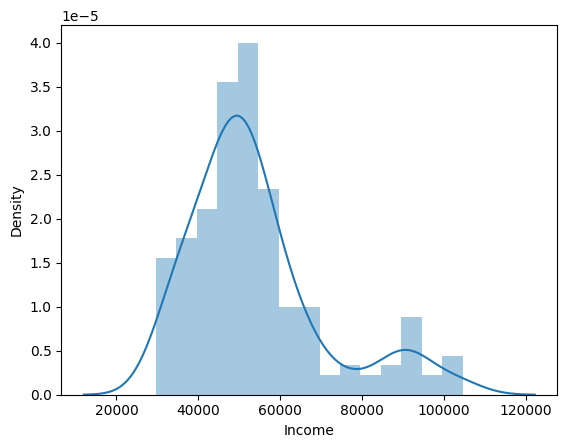

In [ ]:
sns.distplot(df['Age'])
plt.show()

sns.distplot(df['Income'])
plt.show()

 Countplot for categorical variables

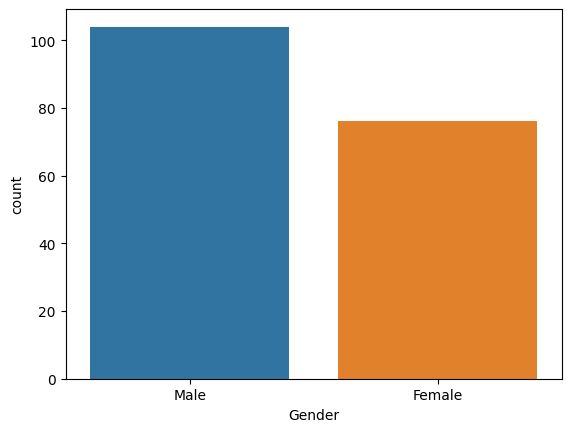

In [ ]:
sns.countplot(x='Gender', data=df)
plt.show()


Hence there are more number of male customers than females

Boxplot for categorical vs continuous variables

missing values

In [ ]:
print(df.isnull().sum())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


Outlier detection using boxplots

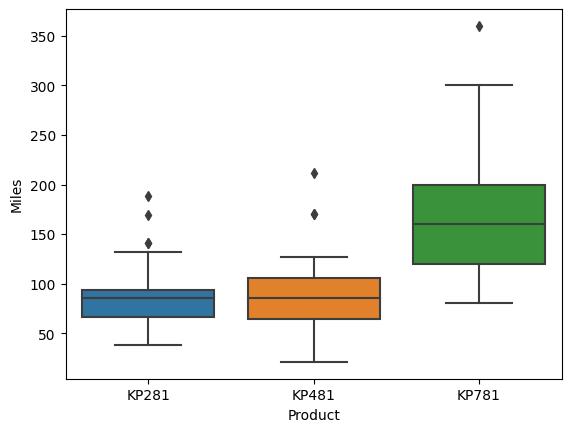

In [ ]:
sns.boxplot(x='Product', y='Miles', data=df)
plt.show()